In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [654]:
# Import df for all lakes
total_lakes_df = pd.read_csv("/Users/emiliodulay/Documents/Programming/Math-42-Final-Project/complete lakes df")

total_lakes_df['lake'].unique()


array(['Superior', 'Michigan-Huron', 'St. Clair', 'Erie', 'Ontario'],
      dtype=object)

# Lake Superior

In [655]:

# Create df for lake superior
superior = total_lakes_df[total_lakes_df['lake'] == "Superior"]

# Convert Units for evap, flow, precip (mm to m)
superior['precipitation'] = superior['precipitation'] / 1000
superior['evaporation'] = superior['evaporation'] / 1000
superior['flow'] = superior['flow'] / 1000

# Reorder Columns so that they follow the order of our model
superior = superior.loc[:,['month', 'year', 'lake', 'water level', 'precipitation', 'flow', 'evaporation']]

# Create df for lake S starting at 1988
superior_1988 = superior.iloc[-396:,:].drop(columns= 'lake').reset_index(drop=True)
superior_1988.head()

/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_89676/772589311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superior['precipitation'] = superior['precipitation'] / 1000
/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_89676/772589311.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superior['evaporation'] = superior['evaporation'] / 1000
/var/folders/69/ysm8yfcn76s_32xvcxfbp8s00000gn/T/ipykernel_89676/772589311.py:7: SettingWithCopyWarning: 
A value is trying to be set on a c

,month,year,water level,precipitation,flow,evaporation
0,1,1988,183.29,0.09561,0.74480,0.02289
1,2,1988,183.22,0.08477,0.92402,0.03598
2,3,1988,183.17,0.04761,1.30492,0.00825
3,4,1988,183.20,0.04684,1.58457,0.03550
4,5,1988,183.24,0.05016,0.89001,0.02357


## Stochastic Error Model: w(n) = w(n-1) + p(n-1) + f(n-1) - e(n-1) + residual

w(n) : expected water level
w(n-1) : previous months water level
p(n-1) : previous months precipitation 
f(n-1) : previous months flow
e(n-1) : previous months evaporation
residual : difference between w(n) and (w(n-1), p(n-1), f(n-1), e(n-1))

In [656]:
p = superior_1988['precipitation']
f = superior_1988['flow']
e = superior_1988['evaporation']
actual = superior_1988['water level']

In [657]:
# Calculate "rough" approximation
preerror_approx = superior_1988['water level'] + p + f - e
actual = superior_1988['water level']
# Error between actual and "rough" approximation
residuals = []
for i in range(1,len(actual)):
    x = actual[i] - preerror_approx[i-1]
    residuals.append(x)

residuals.append(np.mean(residuals))

In [658]:
# Add preerror approximation, actual, and residual to superior 1988
superior_1988['pre-error approximation'] = preerror_approx
superior_1988['actual'] = actual
superior_1988['residuals'] = residuals

superior_1988.head()

,month,year,water level,precipitation,flow,evaporation,pre-error approximation,actual,residuals
0,1,1988,183.29,0.09561,0.74480,0.02289,184.10752,183.29,-0.88752
1,2,1988,183.22,0.08477,0.92402,0.03598,184.19281,183.22,-1.02281
2,3,1988,183.17,0.04761,1.30492,0.00825,184.51428,183.17,-1.31428
3,4,1988,183.20,0.04684,1.58457,0.03550,184.79591,183.20,-1.55591
4,5,1988,183.24,0.05016,0.89001,0.02357,184.15660,183.24,-0.89660


In [659]:
# Error statistics
superior_1988['residuals'].describe()

count    396.000000
mean      -1.141579
std        0.737861
min       -4.075040
25%       -1.635182
50%       -0.995505
75%       -0.562773
max        1.013730
Name: residuals, dtype: float64

<Axes: >

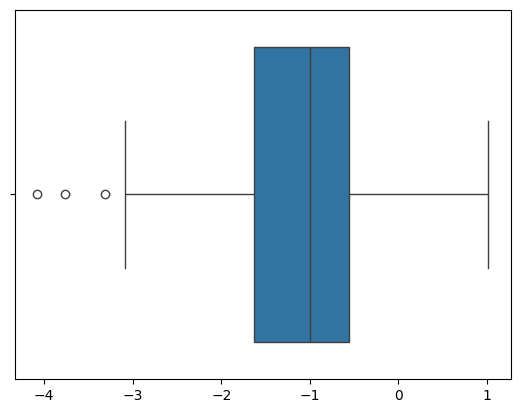

In [660]:
# Plotting Residuals
#plt.hist(residuals,bins = 50)
sns.boxplot(x = residuals)

In [661]:
# Identify the correct starting month
superior_1988['water level'].describe()

count    396.000000
mean     183.355328
std        0.224864
min      182.790000
25%      183.200000
50%      183.350000
75%      183.500000
max      183.880000
Name: water level, dtype: float64

## Model: Known water level at month "n" given "i-1"

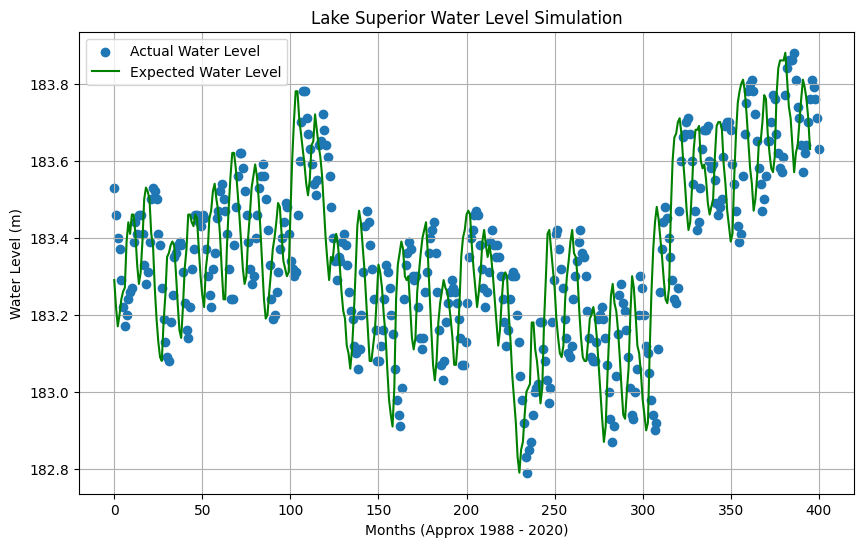

In [662]:
n = 396  # Number of steps
initial_water_level = 183.29  # average water level of Lake Superior 1988 - 2020

# Initialize water levels
expected = [initial_water_level]

# Simulate water levels
for i in range(1, n):
    # Calculate the new water level
    new_level = superior_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] + residuals[i-1]

    expected.append(max(new_level, 0))  # Prevent negative water levels
# Model Accuracy


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3], label = "Actual Water Level")
plt.plot(range(n), expected, label="Expected Water Level", color='green')
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")
plt.title("Lake Superior Water Level Simulation")
plt.legend()
plt.grid()
plt.show()



In [663]:
superior_1988['expected'] = expected
superior_1988.head()


,month,year,water level,precipitation,flow,evaporation,pre-error approximation,actual,residuals,expected
0,1,1988,183.29,0.09561,0.74480,0.02289,184.10752,183.29,-0.88752,183.29
1,2,1988,183.22,0.08477,0.92402,0.03598,184.19281,183.22,-1.02281,183.22
2,3,1988,183.17,0.04761,1.30492,0.00825,184.51428,183.17,-1.31428,183.17
3,4,1988,183.20,0.04684,1.58457,0.03550,184.79591,183.20,-1.55591,183.20
4,5,1988,183.24,0.05016,0.89001,0.02357,184.15660,183.24,-0.89660,183.24


In [664]:
# Model Accuracy

error = actual - expected # difference in expectation and actual

error.describe()


count    396.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: water level, dtype: float64

<Axes: xlabel='water level'>

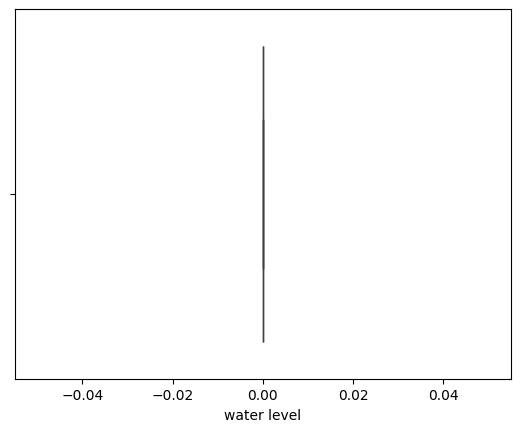

In [665]:
#plt.hist(error)
sns.boxplot(x = error)

In [666]:
'''
Overall the model seems to be pretty accurate. The expected value of month "n" is determined by the water level, precipitation, inflow,  evaporation of the previous month, and 
some residual term. The residual term is determined by the difference in our approximation (expected value) and the actual value. Since the residual term is dependent on knowing
the water level of the next month is, it is impossible to define ~epsilon for months that we do not have data on. As a result, we use past residuals in order to stochastically 
predict what our residual term will be.
'''

'\nOverall the model seems to be pretty accurate. The expected value of month "n" is determined by the water level, precipitation, inflow,  evaporation of the previous month, and \nsome residual term. The residual term is determined by the difference in our approximation (expected value) and the actual value. Since the residual term is dependent on knowing\nthe water level of the next month is, it is impossible to define ~epsilon for months that we do not have data on. As a result, we use past residuals in order to stochastically \npredict what our residual term will be.\n'

## Stochastic residual: RV epsilon ~Normal(residual_mean, residual_std)

count    396.000000
mean       0.056138
std        0.993538
min       -3.747183
25%       -0.524987
50%        0.131357
75%        0.722467
max        2.892899
Name: water level, dtype: float64


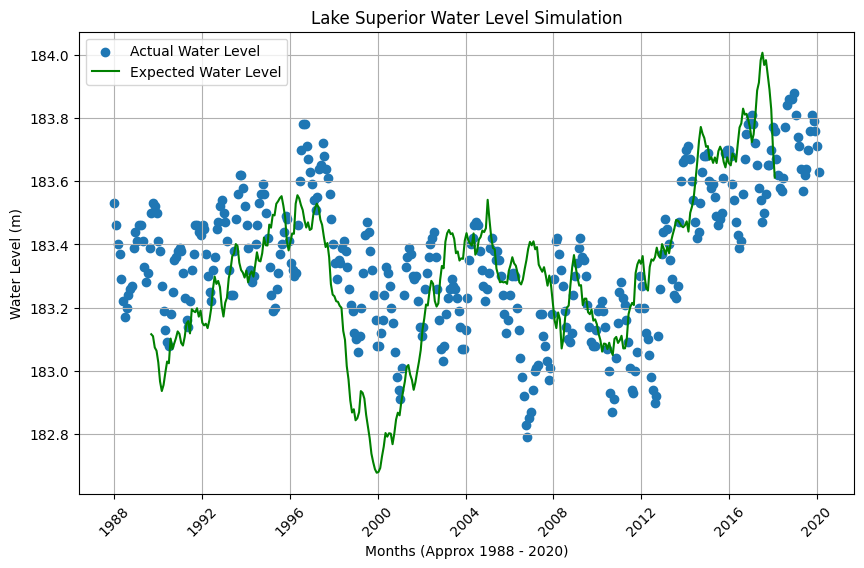

In [667]:
n = 396  # Number of steps
initial_water_level = 183.29  # initial water level for 1/1988

# Initialize water levels
expected = [initial_water_level]

# Residual Information
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Simulate water levels
for i in range(1, n):
    # ~Epsilon RV
    epsilon = np.random.normal(residual_mean, residual_std)
    
    # Calculate the new water level
    new_level = superior_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] + epsilon

    expected.append(max(new_level, 0))  # Prevent negative water levels
# Model Accuracy
error = actual - expected
print(error.describe())

# Smooth expected value
smoothed_expected = pd.Series(expected).rolling(window=42, center=True).mean() # calculate average ever 42 month window

# years x axis ticks
years = pd.date_range(start="1988-01", end="2020-12", freq="YS").year # convert months to years

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3], label = "Actual Water Level") # actual values
plt.plot(range(n), smoothed_expected, label="Expected Water Level", color='green') # expected values
plt.xticks(
    ticks = np.linspace(0, len(superior.iloc[-400:, 3]) -1, len(years))[::4], # Tick every 4 years
    labels= years[::4], # Label every 4 years
    rotation = 45
)
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")
plt.title("Lake Superior Water Level Simulation")
plt.legend()
plt.grid()
plt.show()



### Summary Statistics

In [668]:
### Overall Accuracy of Model over 100 simulations

In [669]:
# I want to find generally summery statistics about the accuracy of my model

n = 396  # Number of steps
initial_water_level = 183.29  # initial water level for 1/1988

# Initialize water levels
expected = [initial_water_level]

# Residual Information
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Simulation Error
error_simulation_100 = []

# Simulate water levels 100 Times 
for j in range(1, 100 + 1):
    
    # Initialize water levels
    expected = [initial_water_level]
    for i in range(1, n):
        # ~Epsilon RV
        epsilon = np.random.normal(residual_mean, residual_std)
        
        # Calculate the new water level
        new_level = superior_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] + epsilon

        expected.append(max(new_level, 0))  # Prevent negative water levels
    # Model Accuracy
    error = actual - expected # Error for each month between actual and expected value
    error_simulation_100.append(error) # Append a error for simulation j to position j in the list.
    
    
error_simulation_100 = np.concatenate(error_simulation_100) # instead of error_simulation_100 containing 100 elements (lists) that each contain the error for between month
                                                            # error_simulation_100 is a list of 100 * len(error) that containes the error between each month for 100 simulations
error_simulation_100_mean = np.mean(error_simulation_100) # average error over 100 simulations
error_simulation_100_std = np.std(error_simulation_100) # standard deviation over 100 simulations

print(error_simulation_100_mean)
print(error_simulation_100_std)
    


-0.001583980094560823
1.0489448203202385


## Stochastic Error With OutFlow Consideration

In [670]:
# Calculate "rough" approximation
o = []
for i in range(1, n):
    r = np.random.normal(0.0065, 0.002)
    preerror_approx[i] = superior_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] - superior_1988['water level'][i-1] * r
    o.append(r)
actual = superior_1988['water level']

# Error between actual and "rough" approximation
residuals = []
for i in range(1,len(actual)):
    x = actual[i] - preerror_approx[i-1]
    residuals.append(x)

residuals.append(np.mean(residuals))

In [671]:
# Add preerror approximation, actual, and residual to superior 1988
superior_1988['pre-error approximation'] = preerror_approx
superior_1988['actual'] = actual
superior_1988['residuals'] = residuals

superior_1988.head()

,month,year,water level,precipitation,flow,evaporation,pre-error approximation,actual,residuals,expected
0,1,1988,183.29,0.09561,0.74480,0.02289,184.107520,183.29,-0.887520,183.29
1,2,1988,183.22,0.08477,0.92402,0.03598,182.608808,183.22,0.561192,183.22
2,3,1988,183.17,0.04761,1.30492,0.00825,182.880641,183.17,0.319359,183.17
3,4,1988,183.20,0.04684,1.58457,0.03550,183.132866,183.20,0.107134,183.20
4,5,1988,183.24,0.05016,0.89001,0.02357,183.235784,183.24,0.024216,183.24


count    396.000000
mean       0.039441
std        1.216044
min       -3.848176
25%       -0.727283
50%        0.057287
75%        0.919152
max        2.826592
Name: water level, dtype: float64


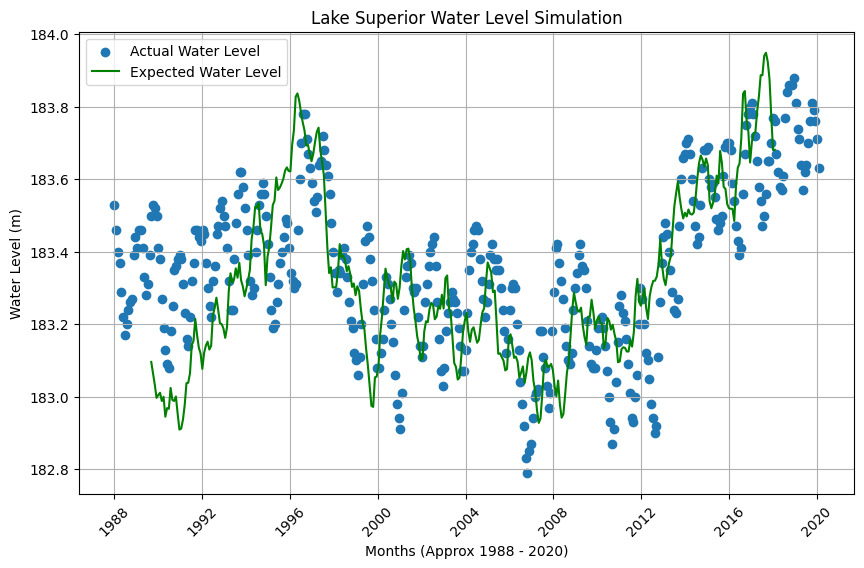

In [672]:
n = 396  # Number of steps
initial_water_level = 183.29  # initial water level for 1/1988

# Initialize water levels
expected = [initial_water_level]

# Residual Information
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Simulate water levels
for i in range(1, n):
    # ~Epsilon RV
    epsilon = np.random.normal(residual_mean, residual_std)
    
    # Calculate the new water level
    new_level = superior_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] - o[i-1] * superior_1988['water level'][i-1] + epsilon

    expected.append(max(new_level, 0))  # Prevent negative water levels
# Model Accuracy
error = actual - expected
print(error.describe())

# Smooth expected value
smoothed_expected = pd.Series(expected).rolling(window=42, center=True).mean() # calculate average ever 42 month window

# years x axis ticks
years = pd.date_range(start="1988-01", end="2020-12", freq="YS").year # convert months to years

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 400, 400), superior.iloc[-400:, 3], label = "Actual Water Level") # actual values
plt.plot(range(n), smoothed_expected, label="Expected Water Level", color='green') # expected values
plt.xticks(
    ticks = np.linspace(0, len(superior.iloc[-400:, 3]) -1, len(years))[::4], # Tick every 4 years
    labels= years[::4], # Label every 4 years
    rotation = 45
)
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")
plt.title("Lake Superior Water Level Simulation")
plt.legend()
plt.grid()
plt.show()



# Lake Michigan-Huron

In [673]:
michigan_1988 = total_lakes_df[(total_lakes_df['lake'] == 'Michigan-Huron') & (total_lakes_df['year'] >= 1988)].drop(columns = "lake").reset_index(drop = True)
michigan_1988 = michigan_1988.loc[:,['month', 'year', 'water level', 'precipitation', 'flow', 'evaporation']]

# Convert Units mm to m
michigan_1988['precipitation'] = michigan_1988['precipitation'] / 1000
michigan_1988['evaporation'] = michigan_1988['evaporation'] / 1000
michigan_1988['flow'] = michigan_1988['flow'] / 1000

# Reset old factors
p = []
f = []
e = []
preerror_approx = []

# Define Factors
p = michigan_1988['precipitation'] # precipitation
f = michigan_1988['flow'] # inflow
e = michigan_1988['evaporation'] # evaporation
actual = michigan_1988['water level'] 
preerror_approx = [] # sum of known factors
o = [] # List of stochastic outflow
n = michigan_1988.shape[0]

# Calculate "rough" approximation
for i in range(1,n):
    r = np.random.normal(0.025, 0.002)
    preerror_approx.append(michigan_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] - michigan_1988['water level'][i-1] * r)
    o.append(r)

# Error between actual and "rough" approximation
residuals = []
for i in range(1,len(actual)):
    x = actual[i] - preerror_approx[i-1]
    residuals.append(x)

# Add preerror approximation, actual, and residual to michigan-huron 1988
michigan_1988['pre-error approximation'] = preerror_approx.append(np.mean(preerror_approx))
michigan_1988['actual'] = actual
michigan_1988['residuals'] = residuals.append(np.mean(residuals))

# Graph Variables
title = "Michigan-Huron"

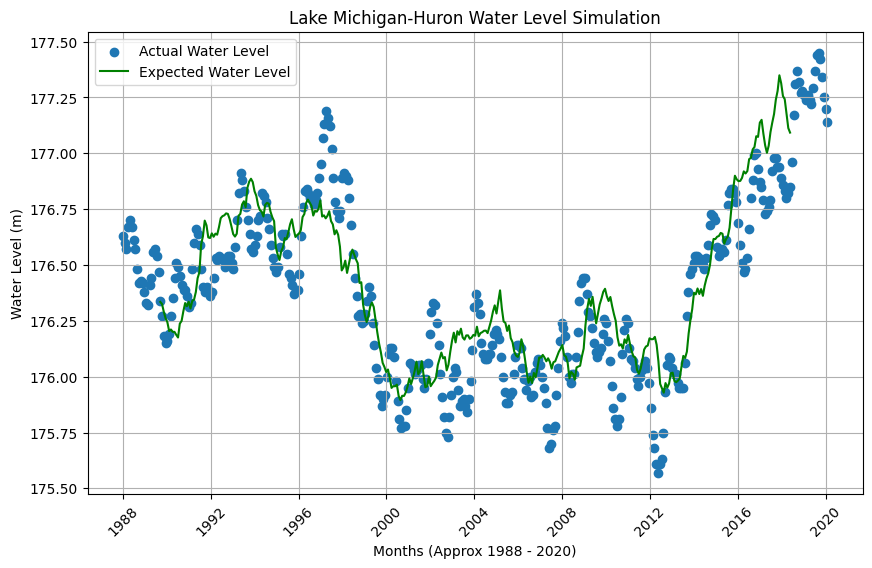

In [674]:
# Model
n = 396  # Number of steps
initial_water_level = michigan_1988['water level'][0]  # initial water level for 1/1988

# Initialize water levels
expected = [initial_water_level]

# Residual Information
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

# Simulate water levels
for i in range(1, n):
    # ~Epsilon RV
    epsilon = np.random.normal(residual_mean, residual_std)
    
    # Calculate the new water level
    new_level = michigan_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] - o[i-1] * michigan_1988['water level'][i-1] + epsilon

    expected.append(max(new_level, 0))  # Prevent negative water levels

# Smooth expected value
smoothed_expected = pd.Series(expected).rolling(window=42, center=True).mean() # calculate moving average ever 42 month window

# years x axis ticks
years = pd.date_range(start="1988-01", end="2020-12", freq="YS").year # convert months to years

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(np.linspace(0, 396, 396), michigan_1988.iloc[:,2], label = "Actual Water Level") # actual values
plt.plot(range(n), smoothed_expected, label="Expected Water Level", color='green') # expected values
plt.xticks(
    ticks = np.linspace(0, len(michigan_1988.iloc[:,2]) -1, len(years))[::4], # Tick every 4 years
    labels= years[::4], # Label every 4 years
    rotation = 45
)
plt.xlabel("Months (Approx 1988 - 2020)")
plt.ylabel("Water Level (m)")
plt.title(f"Lake {title} Water Level Simulation")
plt.legend()
plt.grid()
plt.show()



# Lake St. Clair

In [ ]:
clair_1988 = total_lakes_df[(total_lakes_df['lake'] == 'St. Clair') & (total_lakes_df['year'] >= 1988)].drop(columns = "lake").reset_index(drop = True)
clair_1988 = clair_1988.loc[:,['month', 'year', 'water level', 'precipitation', 'flow', 'evaporation']]

# Convert Units mm to m
clair_1988['precipitation'] = clair_1988['precipitation'] / 1000
clair_1988['evaporation'] = clair_1988['evaporation'] / 1000
clair_1988['flow'] = clair_1988['flow'] / 1000

# Reset old factors
p = []
f = []
e = []
preerror_approx = []

# Define Factors
p = clair_1988['precipitation'] # precipitation
f = clair_1988['flow'] # inflow
e = michigan_1988['evaporation'] # evaporation
actual = michigan_1988['water level'] 
preerror_approx = [] # sum of known factors
o = [] # List of stochastic outflow
n = michigan_1988.shape[0]

# Calculate "rough" approximation
for i in range(1,n):
    r = np.random.normal(0.025, 0.002)
    preerror_approx.append(michigan_1988['water level'][i-1] + p[i-1] + f[i-1] - e[i-1] - michigan_1988['water level'][i-1] * r)
    o.append(r)

# Error between actual and "rough" approximation
residuals = []
for i in range(1,len(actual)):
    x = actual[i] - preerror_approx[i-1]
    residuals.append(x)

# Add preerror approximation, actual, and residual to michigan-huron 1988
michigan_1988['pre-error approximation'] = preerror_approx.append(np.mean(preerror_approx))
michigan_1988['actual'] = actual
michigan_1988['residuals'] = residuals.append(np.mean(residuals))

# Graph Variables
title = "Michigan-Huron"